# PREDICTING VANCOUVER WEATHER PROPOSAL

## Introduction 

The dataset we are using for our analysis is the daily weather data recorded in Vancouver (on visualcrossing.com) between 31st December 2017, and 31st December 2022. This dataset contains information such as the daily temperature, humidity levels, windspeed, precipitation cover and so on. It also includes the daily simple weather type in the form of picking an icon to show whether it is a clear day, raining, snowing, and so on. Vancouver is known for raining a lot throughout the year, but there are still many days where there is no precipitation or where the precipitation is something different. We have decided to use this dataset to reasonably predict the weather type on any given day based on other meteorological factors. Therefore our question is, what is the type of weather expected on a certain day in Vancouver, given only the temperature, humidity, pressure, cloud cover, sea level pressure, and wind speed?


Reference: https://www.visualcrossing.com/

## Methods
We will use the temperature (Celsius), feels-like temperature (Celsius), humidity (g/m^3), cloud cover (%), sea level pressure, and the wind speed (km/h) in order to determine the expected weather. Before working with the actual data, we are planning to predict the weather type by using common sense. For example, when the temperature is high, the expected precipitation is likely going to be on the lower side. Higher wind speed would indicate the higher precipitation rate. Then, we will use the functions and code that we learned from classification lessons to determine the actual weather type for specific days in Vancouver. We are planning to create several different scatterplots with different y-axis: temperature, humidity, cloud cover, sea level pressure, and wind speed. The date will be the x-axis and we will categorize each point as its weather type for all graphs.


## Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# read data as tibble
weather_data <- read_csv("data/vancouver_weather.csv")
weather_data



Rows: 876 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): name, preciptype, conditions, description, icon, stations
dbl  (24): tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, de...
dttm  (2): sunrise, sunset
date  (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,⋯,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>
vancouver,2020-10-31,10.3,4.7,7.3,10.3,4.6,7.2,4.7,83.8,⋯,7.6,4,NA,2020-10-31 07:59:48,2020-10-31 17:51:33,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-01,12.6,4.5,7.5,12.6,3.1,7.3,5.4,86.8,⋯,8.6,4,NA,2020-11-01 07:01:25,2020-11-01 16:49:54,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-02,13.3,5.2,10.1,13.3,5.2,10.0,6.7,80.4,⋯,6.6,4,NA,2020-11-02 07:03:02,2020-11-02 16:48:16,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-03,11.1,9.6,10.4,11.1,8.6,10.3,9.8,96.3,⋯,0.5,0,NA,2020-11-03 07:04:39,2020-11-03 16:46:40,0.61,"Rain, Overcast",Cloudy skies throughout the day with a chance of rain throughout the day.,rain,"71608099999,CWWA,71784099999,D3147,E9431,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-04,14.7,11.7,13.4,14.7,11.7,13.4,12.6,95.3,⋯,1.0,1,NA,2020-11-04 07:06:16,2020-11-04 16:45:06,0.64,"Rain, Overcast",Cloudy skies throughout the day with a chance of rain throughout the day.,rain,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-05,14.3,6.6,10.1,14.3,6.2,10.1,6.5,78.6,⋯,3.3,2,NA,2020-11-05 07:07:53,2020-11-05 16:43:34,0.68,"Rain, Partially cloudy",Partly cloudy throughout the day with early morning rain.,rain,"71608099999,CWWA,71784099999,CWSK,CWEL,CWEZ,CWWK,71892099999,CWMM,71042099999,71201099999,F1856"
vancouver,2020-11-06,9.3,3.8,6.7,9.0,0.4,4.7,2.9,76.9,⋯,8.1,4,NA,2020-11-06 07:09:31,2020-11-06 16:42:03,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-07,9.1,2.5,5.7,9.1,-0.5,4.2,-0.3,69.1,⋯,5.7,3,NA,2020-11-07 07:11:08,2020-11-07 16:40:34,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"
vancouver,2020-11-08,8.4,1.8,4.6,8.3,-1.4,4.1,-3.6,56.9,⋯,7.8,4,NA,2020-11-08 07:12:44,2020-11-08 16:39:07,0.75,Clear,Clear conditions throughout the day.,clear-day,"71608099999,CWWA,71784099999,71892099999,71042099999,71201099999,F1856"


In [3]:
# selected out variables that are irrelivant to our predictions
weather_selected <- weather_data |>
    select(datetime, temp, feelslike, humidity, sealevelpressure, windspeed, cloudcover, icon) |>
    rename(weather = icon)
weather_selected

datetime,temp,feelslike,humidity,sealevelpressure,windspeed,cloudcover,weather
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2020-10-31,7.3,7.2,83.8,1029.0,6.3,47.8,partly-cloudy-day
2020-11-01,7.5,7.3,86.8,1024.2,7.5,29.9,partly-cloudy-day
2020-11-02,10.1,10.0,80.4,1017.9,8.4,63.8,partly-cloudy-day
2020-11-03,10.4,10.3,96.3,1011.2,13.8,90.2,rain
2020-11-04,13.4,13.4,95.3,1011.9,15.5,90.9,rain
2020-11-05,10.1,10.1,78.6,1015.5,14.4,82.9,rain
2020-11-06,6.7,4.7,76.9,1012.2,20.7,36.4,partly-cloudy-day
2020-11-07,5.7,4.2,69.1,1008.9,16.3,30.6,partly-cloudy-day
2020-11-08,4.6,4.1,56.9,1018.5,14.5,13.0,clear-day


In [4]:
# split data into training and testing sets
set.seed(1234)

weather_split <- initial_split(weather_selected, prop = 0.75, strata = weather)
weather_training <- training(weather_split)
weather_testing <- testing(weather_split)


In [5]:
# summarize table
# hello

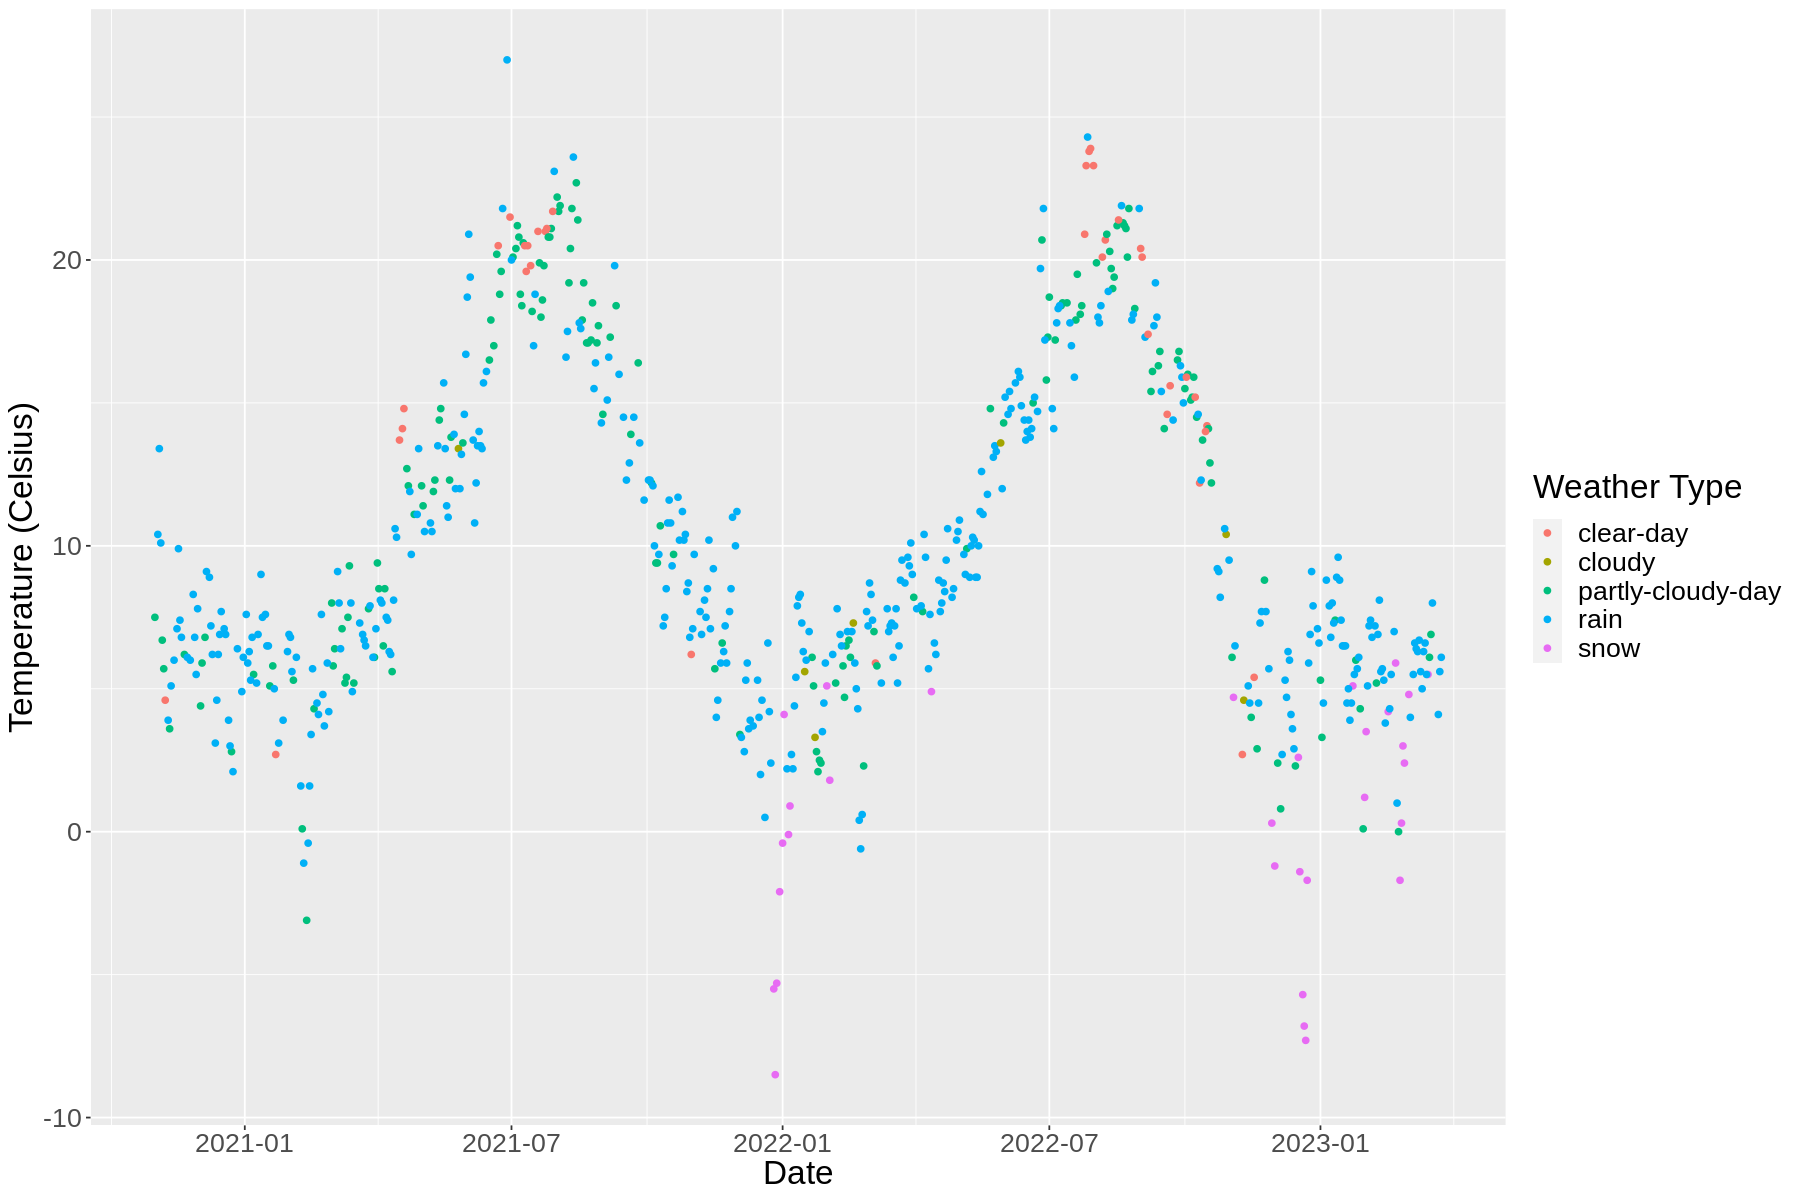

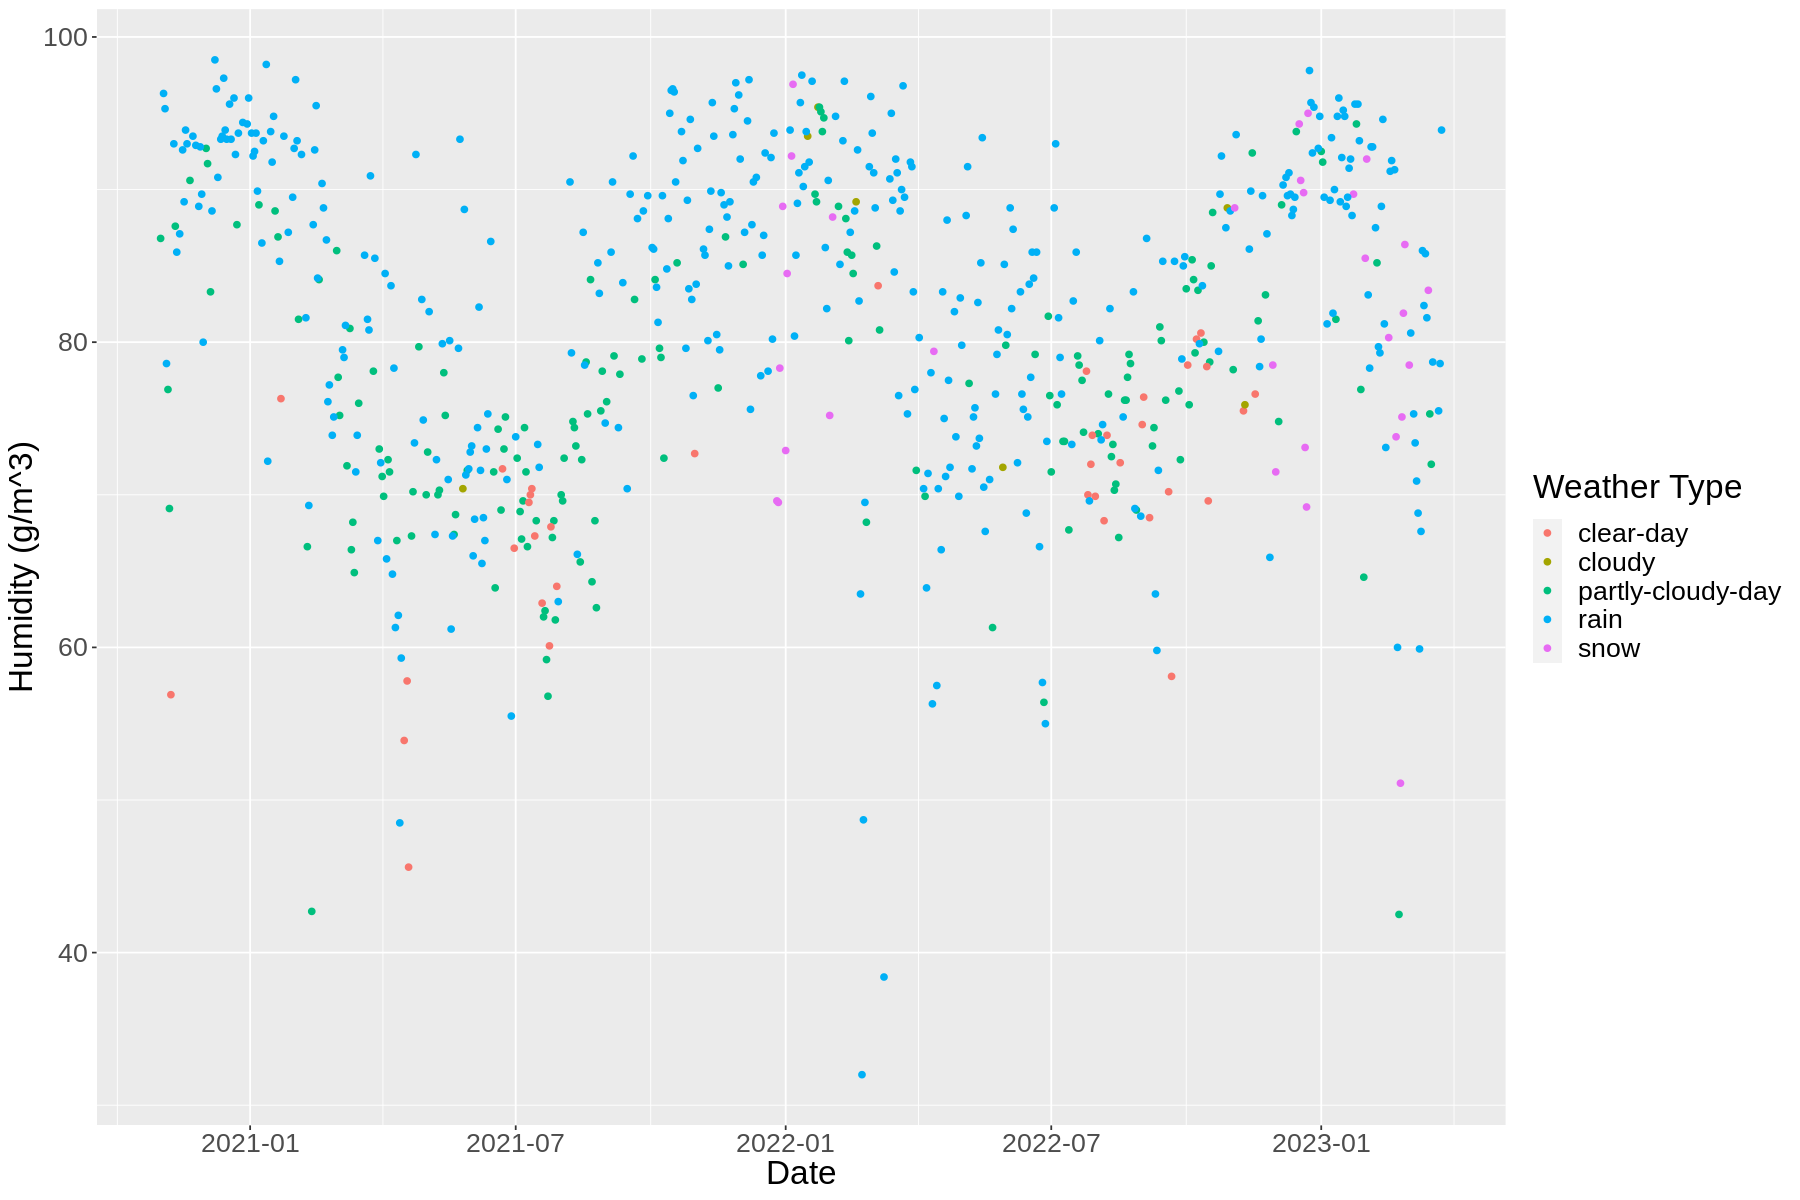

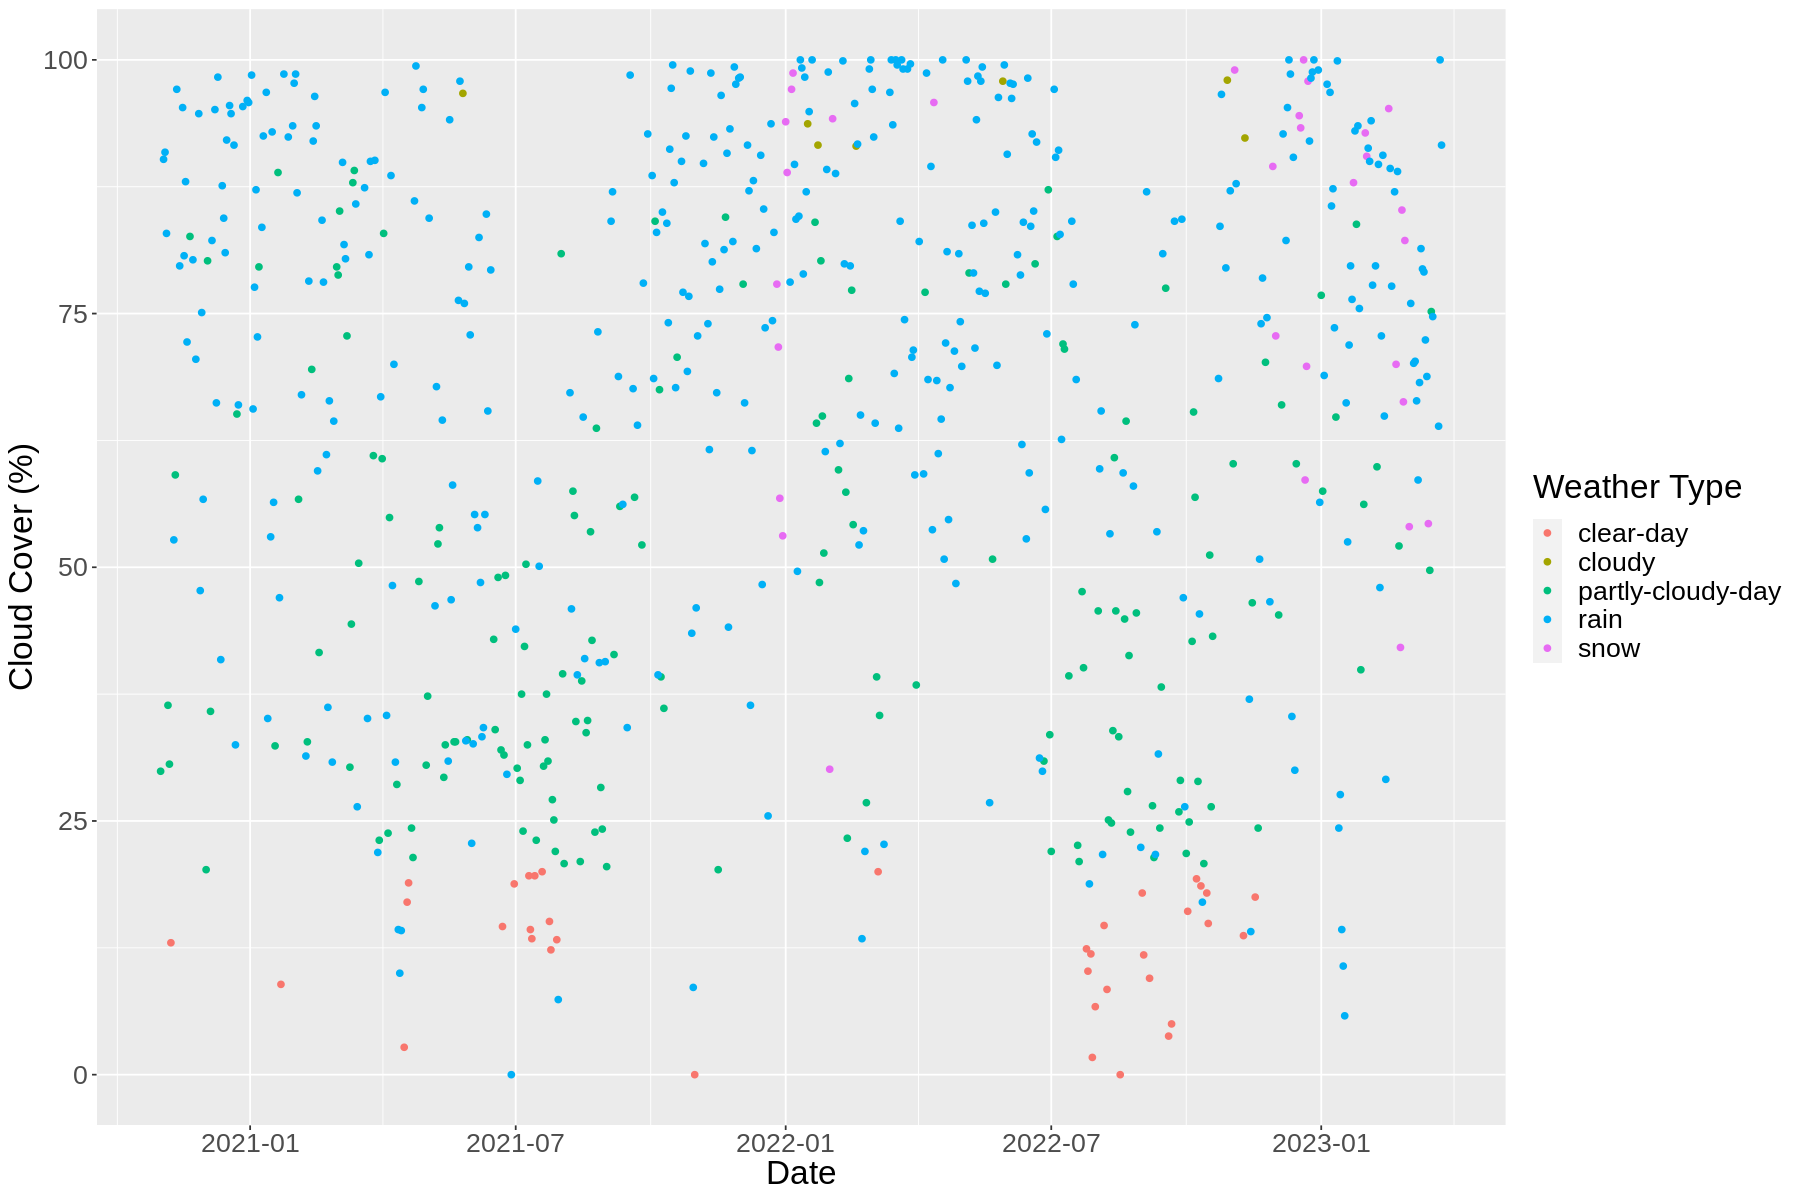

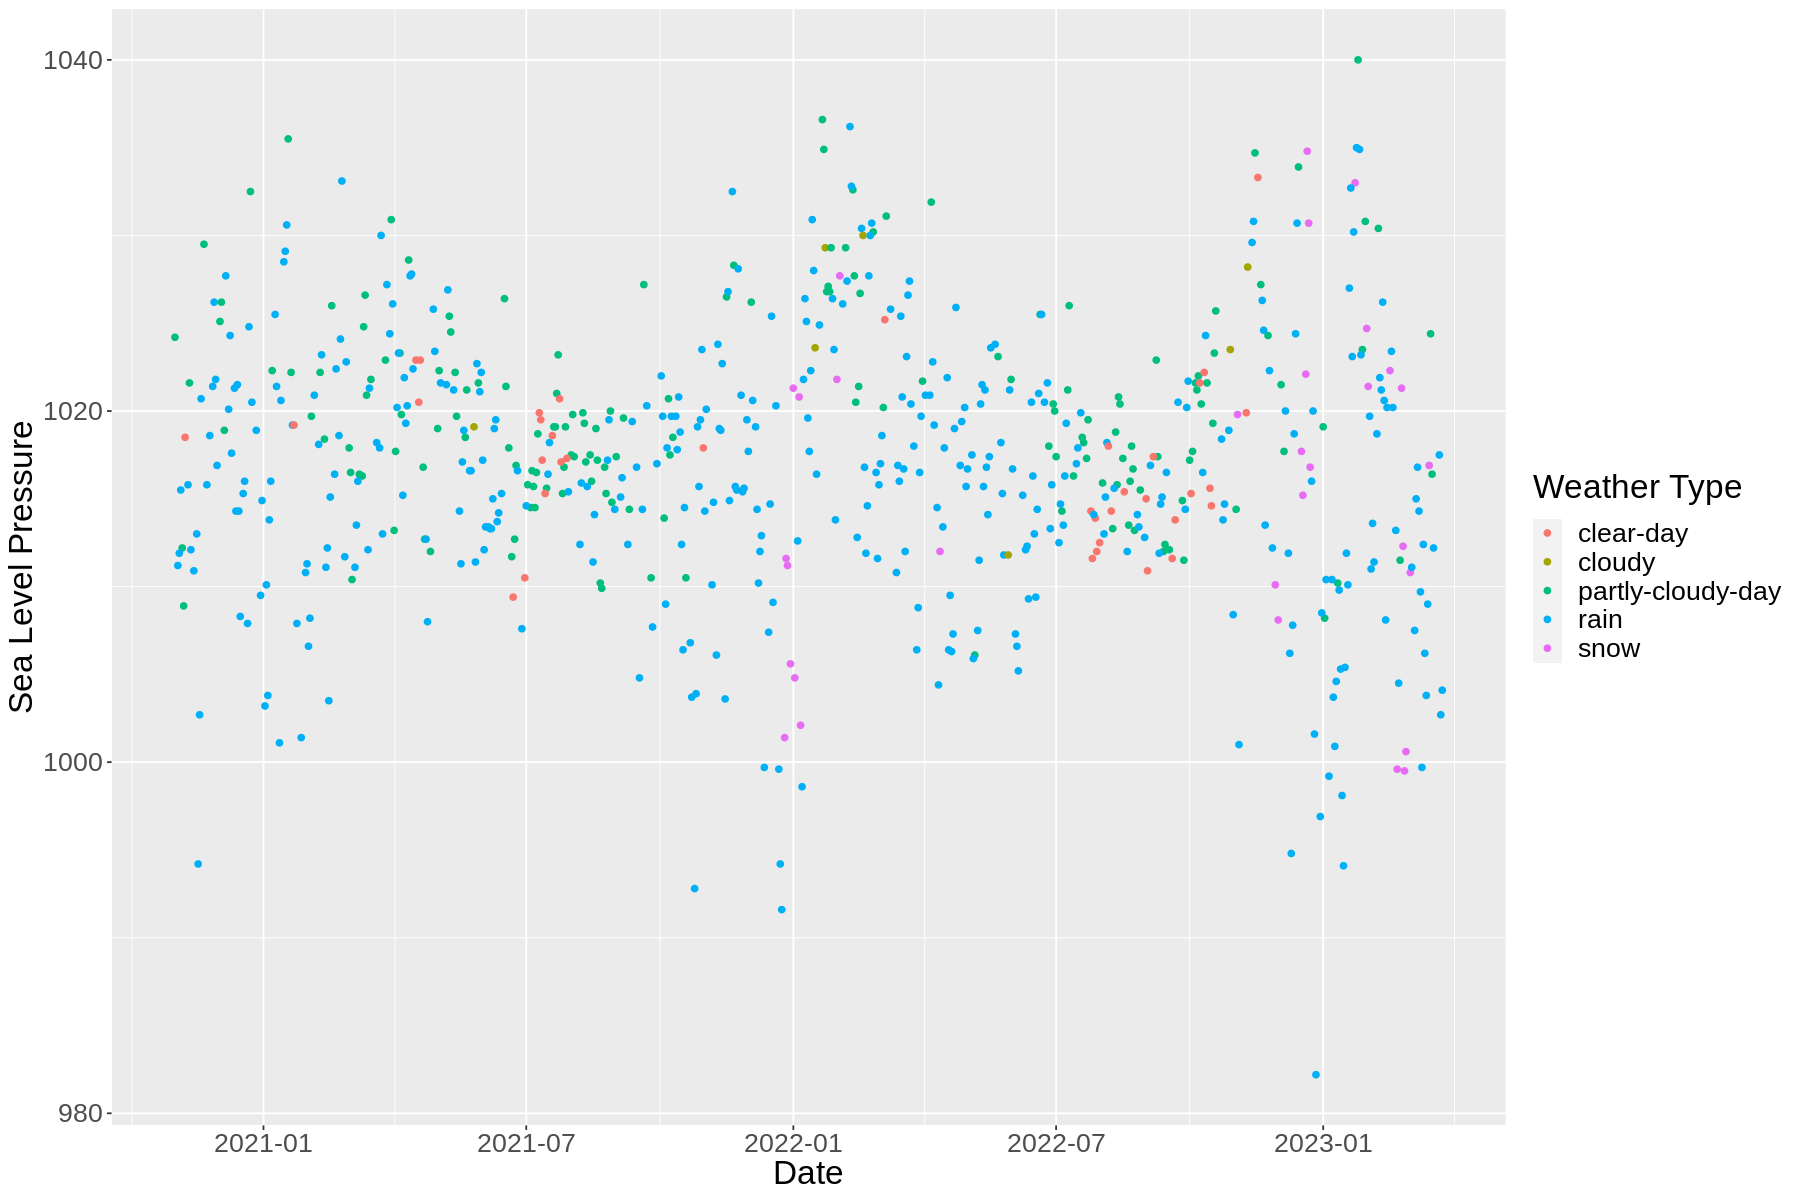

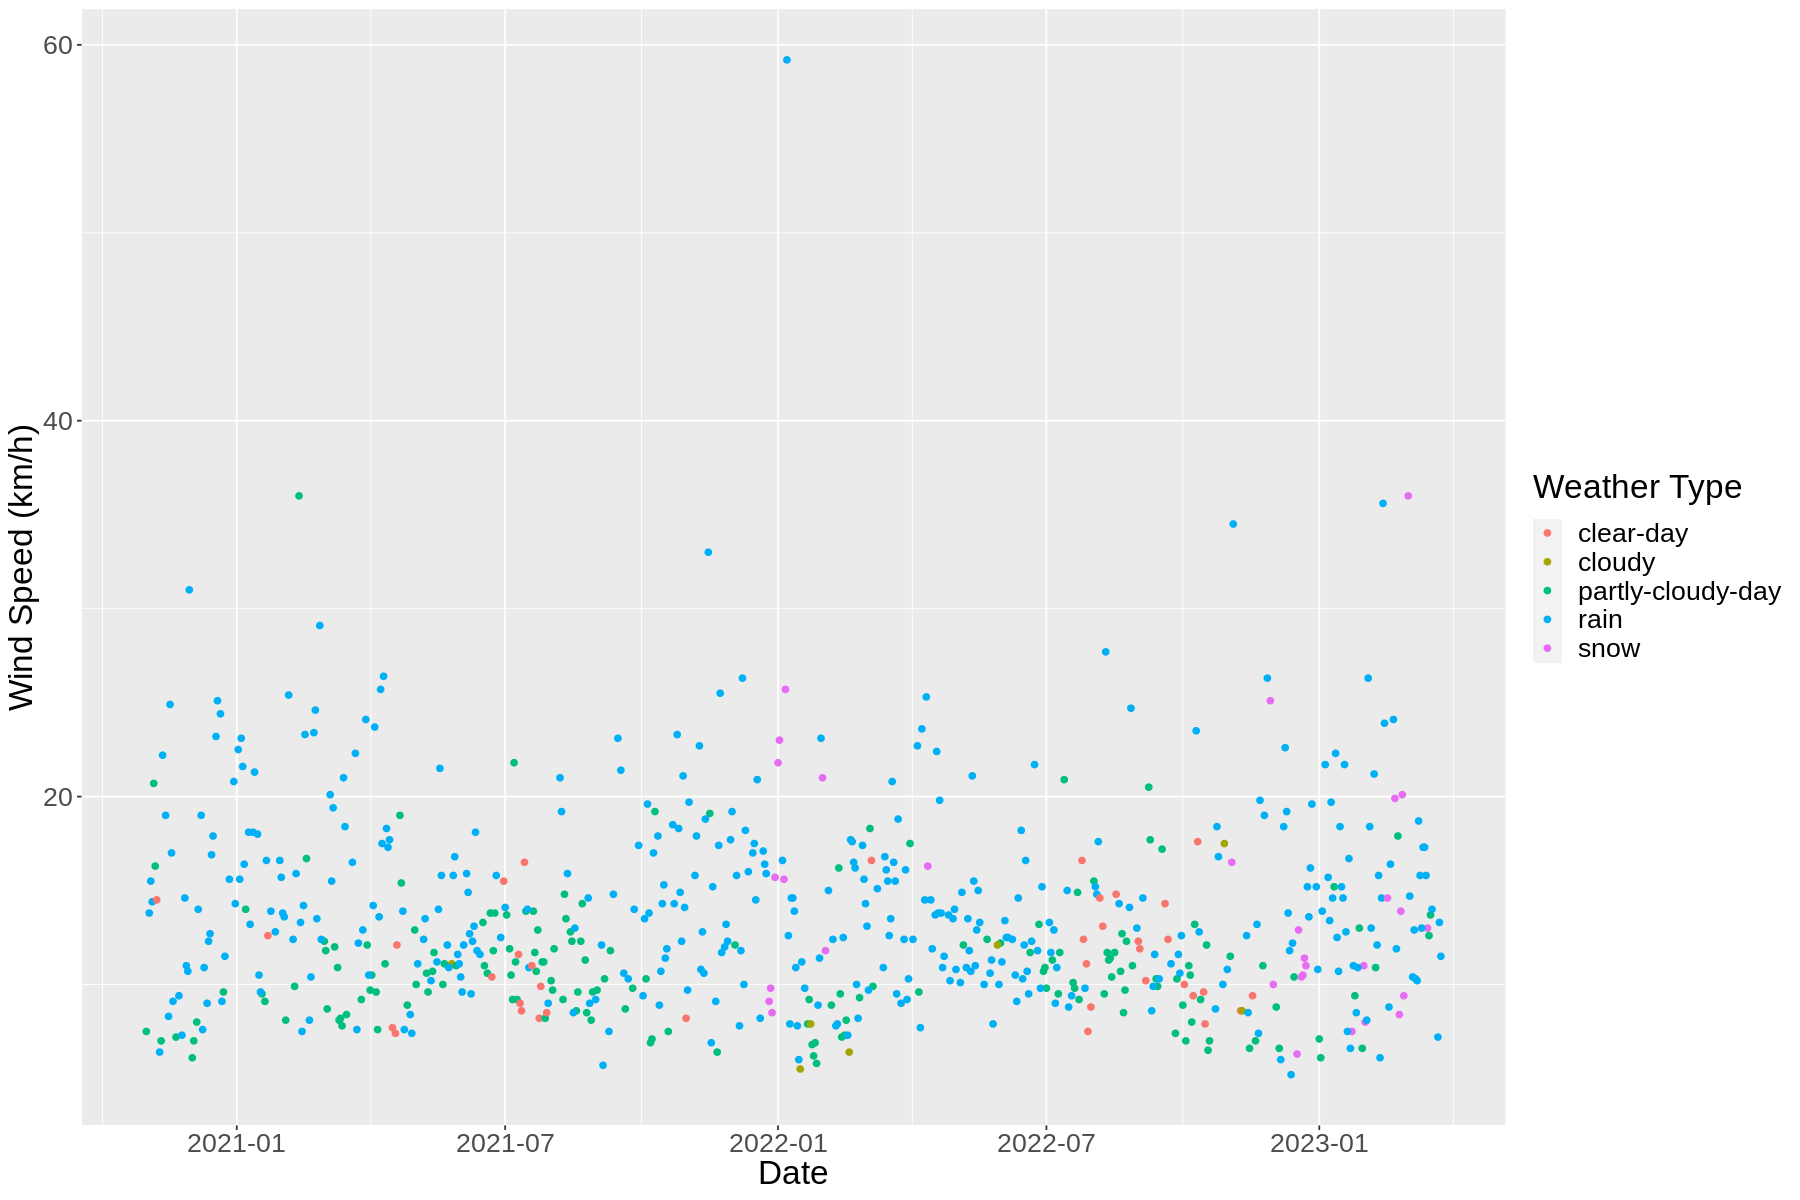

In [14]:
# graph data
options(repr.plot.width = 15, repr.plot.height = 10)

temperature_plot <- weather_training |>
    ggplot(aes(x=datetime, y=temp)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Temperature (Celsius)", color="Weather Type") +
    theme(text = element_text(size=20))

humidity_plot <- weather_training |>
    ggplot(aes(x=datetime, y=humidity)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Humidity (g/m^3)", color="Weather Type") +
    theme(text = element_text(size=20))

cloud_plot <- weather_training |>
    ggplot(aes(x=datetime, y=cloudcover)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Cloud Cover (%)", color="Weather Type") +
    theme(text = element_text(size=20))

pressure_plot <- weather_training |>
    ggplot(aes(x=datetime, y=sealevelpressure)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Sea Level Pressure", color="Weather Type") +
    theme(text = element_text(size=20))

wind_plot <- weather_training |>
    ggplot(aes(x=datetime, y=windspeed)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Wind Speed (km/h)", color="Weather Type") +
    theme(text = element_text(size=20))



temperature_plot
humidity_plot
cloud_plot
pressure_plot
wind_plot

## Expected outcomes and significance
The expectation is to be able to reasonably predict the type of precipitation on a given day in Vancouver, British Columbia. We believe that although weather can be unpredictable, if some other data indicators are given it may be possible to develop a model for predicting the general weather type for a given day. The impact of the model being successful would be that it could be useful in summarizing the precipitation type of a day using only certain indicators. It can act as a redundant tool or even a general model that can be scaled to let people know the general weather of a day, which can be useful in implementing a weather app for example. This will lead to future questions of how localized the model will be and how feasible it would be for other locations.
